In [9]:
%matplotlib inline 

from yzGALFAHI.get_cubeinfo import get_cubeinfo
import astropy.io.fits as fits
import matplotlib.pyplot as plt 
import numpy as np 
from astropy.wcs import WCS 

In [8]:
file_ori = '/Users/Yong/Dropbox/databucket/HI4PI_cubes/CAR_B18.fits'
file_sm = '/Users/Yong/Dropbox/HIdwarflimits_paperfinal/HI4PI_smooth_MP_0719/CAR_B18_sm.fits'

data_ori = fits.getdata(file_ori)
header_ori = fits.getheader(file_ori)
ra_ori, dec_ori, vlsr_ori, hdrarrs_ori = get_cubeinfo(header_ori, returnHeader=True)

data_sm = fits.getdata(file_sm)
header_sm = fits.getheader(file_sm)
ra_sm, dec_sm, vlsr_sm, hdrarrs_sm = get_cubeinfo(header_sm, returnHeader=True)

In [10]:
wcs_ori = WCS(hdrarrs_ori[0])
wcs_sm = WCS(hdrarrs_sm[0])

In [35]:
ira = '23h50m00s'
idec = '-55d00m00s'

from astropy.coordinates import SkyCoord 
import astropy.units as u

coord = SkyCoord(ra=ira, dec=idec, frame='icrs', unit=(u.hour, u.deg))
ira_deg = coord.icrs.ra.deg 
idec_deg = coord.icrs.dec.deg 

px_ori, py_ori = wcs_ori.all_world2pix(ira_deg, idec_deg, 0)
px_ori = int(px_ori)
py_ori = int(py_ori)
print(px_ori, py_ori)

px_sm, py_sm = wcs_sm.all_world2pix(ira_deg, idec_deg, 0)
px_sm = int(px_sm)
py_sm = int(py_sm)
print(px_sm, py_sm)

42 192
42 192


In [36]:
spec_ori = np.mean(np.mean(data_ori[:, py_ori-2:py_ori+2, px_ori-2:px_ori+2], axis=-1), axis=-1)
spec_sm = np.mean(np.mean(data_sm[:, py_sm-3:py_sm+3, px_sm-3:px_sm+3], axis=-1), axis=-1)

(-0.05, 0.5)

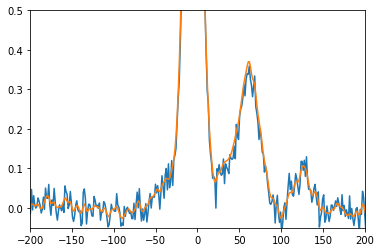

In [38]:
plt.plot(vlsr_ori, spec_ori, label='smooth over 16.2 arcmin')
plt.plot(vlsr_sm, spec_sm, label='smooth over 30 arcmin')
plt.xlim(-200, 200)
plt.ylim(-0.05, 0.5)

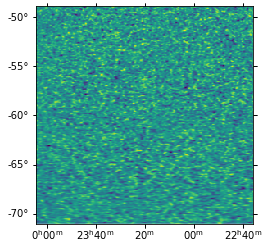

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_ori)
ax.imshow(data_ori[300])